# Statistics on binding energies of zeolite-OSDA pairs

This notebook reproduces Fig. S1-S3 of the paper, showing statistics on zeolite-OSDA pairs

In [1]:
import itertools
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from scipy import stats

df = pd.read_csv('../data/binding.csv', index_col=0)

/home/dskoda/.conda/envs/htvs/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Number of frameworks

In [2]:
counts = df['Zeolite'].value_counts().sort_index()

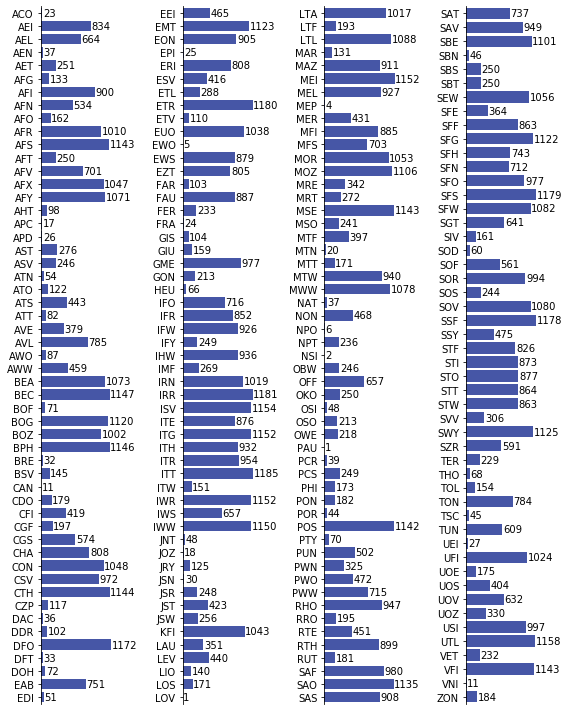

In [3]:
NCOLS = 4

fig, ax_fig = plt.subplots(1, NCOLS, figsize=(8, 10))

STEP = np.ceil(len(counts) / NCOLS)

for ax, i in zip(ax_fig, np.arange(0, len(counts), STEP)):
    subcnt = counts[int(i):int(i + STEP)]
    yticks = np.arange(len(subcnt))
    ax.barh(yticks, subcnt.values, color='#4656A6')
    ax.set_yticks(yticks)    
    ax.set_yticklabels(subcnt.index)
    ax.set_ylim(yticks[-1] + 0.5, yticks[0] - 0.5)
    
    for y, v in zip(yticks, subcnt.values):
        ax.annotate(
            str(int(v)),
            (v + 10, y),
            va='center',
#             color='w',
        )
    
    for sp in ['bottom', 'top', 'right']:
        ax.spines[sp].set_visible(False)

    ax.set_xticks([])

fig.tight_layout()

plt.show()

## Figs. S2-S3

In [4]:
norm = mpl.colors.LogNorm(1, 1e4)

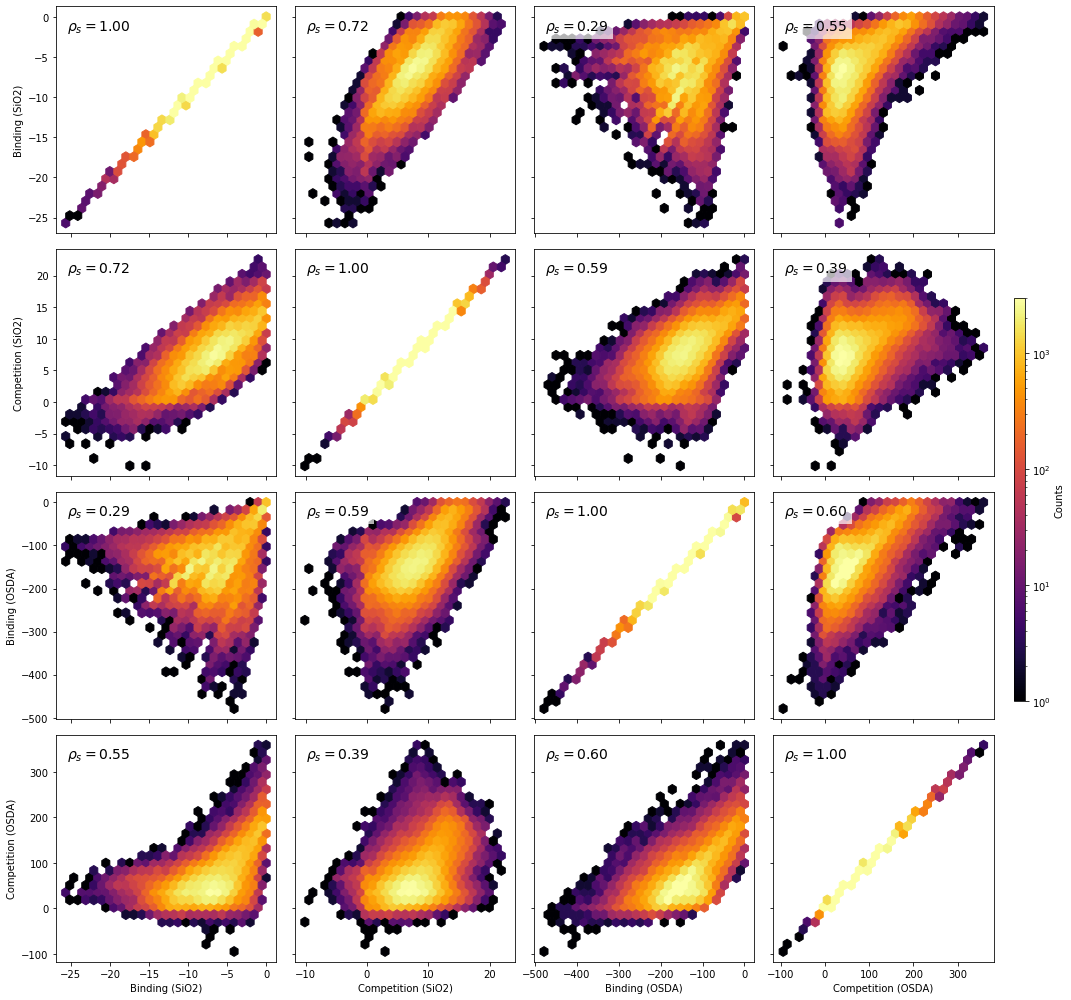

In [5]:
x_options = ['Binding (SiO2)', 'Competition (SiO2)', 'Binding (OSDA)', 'Competition (OSDA)']
y_options = x_options

Nx = len(x_options)
Ny = len(y_options)

data = df
norm = mpl.colors.LogNorm(1, 3e3)
cmap = 'inferno'

fig, ax_fig = plt.subplots(Ny, Nx, figsize=(3.5 * Ny, 3.5 * Nx))

for i, (y, x), ax in zip(range(Nx * Ny), itertools.product(y_options, x_options), ax_fig.reshape(-1)):
    ax.hexbin(data[x], data[y], gridsize=25, mincnt=1, cmap=cmap, norm=norm)
    
    spearmanr, _ = stats.spearmanr(data[x].values, data[y].values)
    
    row = i // Ny
    col = i % Nx
    
    if row == Nx - 1:
        ax.set_xlabel(x)
    else:
        ax.set_xticklabels([])
    
    if col == 0:
        ax.set_ylabel(y)   
    else:
        ax.set_yticklabels([])
        
    ax.annotate(
         f'$\\rho_s = ${spearmanr:.2f}',
        (0.05, 0.95),
        xycoords='axes fraction',
        fontsize=14,
        bbox=dict(facecolor='white', alpha=0.7, linewidth=0),
        va='top'
    )

fig.tight_layout()
cbar_map = cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = fig.colorbar(cbar_map, cax=fig.add_axes([1.01, 0.3, 0.01, 0.4]))
cbar.set_label('Counts')

plt.show()

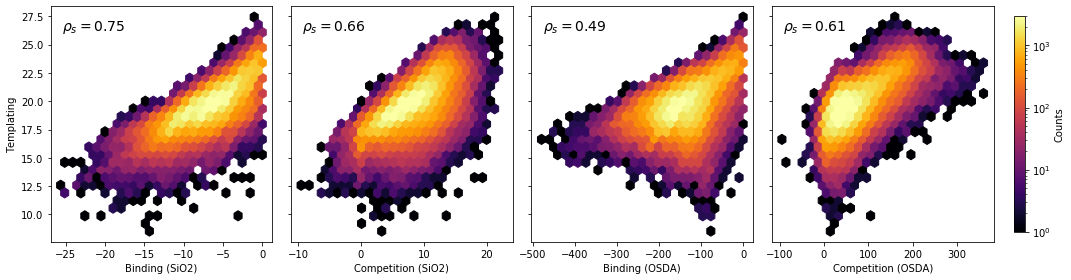

In [6]:
x_options = ['Binding (SiO2)', 'Competition (SiO2)', 'Binding (OSDA)', 'Competition (OSDA)']

fig, ax_fig = plt.subplots(1, len(x_options), figsize=(3.5 * len(x_options), 4), sharey=True)

y = 'Templating'

df_ = df#.loc[df.substrate == 'AEI']
norm = mpl.colors.LogNorm(1, 3e3)
cmap = 'inferno'

for x, ax in zip(x_options, ax_fig):
    ax.hexbin(df_[x], df_[y], gridsize=25, yscale='linear', mincnt=1, cmap=cmap, norm=norm)
    rhodf = df_[[x, y]].dropna()
    spearmanr, _ = stats.spearmanr(rhodf[x].values, rhodf[y].values)
    ax.set_xlabel(x)
    ax.annotate(
         f'$\\rho_s = ${spearmanr:.2f}',
        (0.05, 0.95),
        xycoords='axes fraction',
        fontsize=14,
        bbox=dict(facecolor='white', alpha=0.4, linewidth=0),
        va='top'
    )

ax_fig[0].set_ylabel(y)

fig.tight_layout()
cbar_map = cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = fig.colorbar(cbar_map, cax=fig.add_axes([1.01, 0.18, 0.01, 0.75]))
cbar.set_label('Counts')


plt.show()